In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [4]:
n = 500
x1 = np.random.uniform(-5, 5, n)
x2 = np.random.uniform(-5, 5, n)

In [5]:
x1

array([-2.11524079,  3.33292611,  1.64059211, -3.71678226,  3.62523403,
        2.31025909, -0.99268494, -1.555046  ,  1.01595849, -2.86192033,
        3.39652274,  0.73865524, -1.43955178,  0.70924576,  2.27331963,
        3.79386528,  3.68022249, -4.79527676, -0.2776915 ,  2.74310223,
        1.48006748, -0.1311758 ,  2.44874371, -0.29723885, -4.59553347,
       -0.22303918,  1.05877243,  2.8652478 ,  0.43590976, -3.22012461,
        3.14777837, -1.42961083,  1.36680193, -3.02102741, -0.80501787,
        4.86125516, -3.06702552,  0.06373423, -1.90290019, -4.09400165,
        2.76111928, -1.77072991,  1.47631651,  0.86556948, -0.40003886,
       -3.98164457, -1.9540347 ,  4.57640628,  2.43444706, -0.94178458,
       -0.99110479,  1.65742357,  3.11859233,  4.91971895, -3.31464192,
       -1.30440551,  0.01593606,  4.73854127, -0.82077509, -2.14959931,
       -1.41139227, -1.75263987, -2.56635363,  2.77820849,  3.19713479,
       -2.85746468,  4.17781252, -3.76767183, -4.6605454 , -4.21

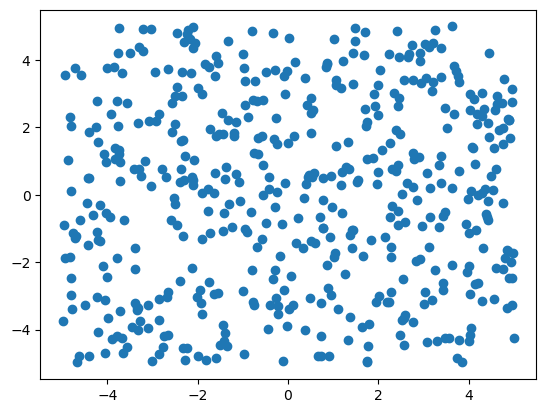

In [6]:
plt.scatter(x1, x2)

In [7]:
inner_r = 1
outer_r = 4

In [8]:
theta = np.random.uniform(0, 2*np.pi, n)
radius = np.random.uniform(inner_r, outer_r, n)

In [9]:
x1 = radius*np.cos(theta)
x2 = radius*np.sin(theta)

In [10]:
noise = np.random.normal(0, 0.5, n)

In [11]:
x1 += noise
x2 += noise

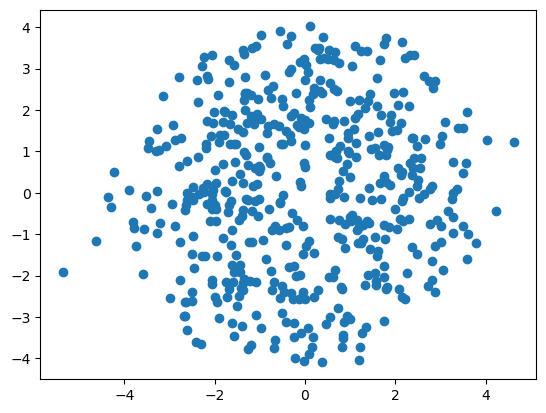

In [12]:
plt.scatter(x1, x2)

In [13]:
y = 2*x1**2 + 3*x2**2 + np.random.normal(0, 2, n)

In [14]:
df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})

In [15]:
print(df.head())

         x1        x2          y
0 -0.001278 -2.576265  20.333020
1  0.342718  3.226793  30.009770
2  0.864145 -0.109420   0.556957
3 -2.452302 -1.817746  22.281268
4 -2.099899 -0.683475   8.197835


In [16]:
x1_squared = x1**2
x2_squared = x2**2
x1_x2 = x1*x2

In [17]:
def calculate_quadratic_interaction(x1, x2):
    x1_squared = x1**2
    x2_squared = x2**2
    x1_x2 = x1*x2
    x1_squared_x2_squared = x1_squared * x2_squared
    return pd.Series({'x1_squared': x1_squared, 'x2_squared': x2_squared, 'x1_x2': x1_x2})

In [18]:
df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y}).join(df.apply(lambda x: calculate_quadratic_interaction(x['x1'], x['x2']), axis=1))

In [19]:
df.head()

,x1,x2,y,x1_squared,x2_squared,x1_x2
0,-0.001278,-2.576265,20.333020,0.000002,6.637143,0.003291
1,0.342718,3.226793,30.009770,0.117455,10.412194,1.105879
2,0.864145,-0.109420,0.556957,0.746746,0.011973,-0.094555
3,-2.452302,-1.817746,22.281268,6.013784,3.304200,4.457661
4,-2.099899,-0.683475,8.197835,4.409574,0.467138,1.435228


In [20]:
df.to_csv('quadratic_data.csv', index=False)

In [21]:
!head quadratic_data.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


In [22]:
df.to_csv('quadratic_data.csv', index=False, header=False)